In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings

# Preprocessing

In [5]:
warnings.filterwarnings('ignore')
df = pd.read_csv('D3.csv')

In [6]:
missing_values = df.isna() 
print(missing_values.sum())

race                        1016
gender                         0
age                           10
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 9
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
insulin                        0
change                         0
diabetesMed                    0
readmitted                     0
dtype: int

In [7]:
df = df.dropna(subset=["race", "chlorpropamide", "age"])

In [8]:
missing_values = df.isna() 
print(missing_values.sum())

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
insulin                     0
change                      0
diabetesMed                 0
readmitted                  0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50732 entries, 0 to 51765
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      50732 non-null  object
 1   gender                    50732 non-null  object
 2   age                       50732 non-null  object
 3   admission_type_id         50732 non-null  int64 
 4   discharge_disposition_id  50732 non-null  int64 
 5   admission_source_id       50732 non-null  int64 
 6   time_in_hospital          50732 non-null  int64 
 7   medical_specialty         50732 non-null  object
 8   num_lab_procedures        50732 non-null  int64 
 9   num_procedures            50732 non-null  int64 
 10  num_medications           50732 non-null  int64 
 11  number_outpatient         50732 non-null  int64 
 12  number_emergency          50732 non-null  int64 
 13  number_inpatient          50732 non-null  int64 
 14  number_diagnoses      

In [10]:
df['tolbutamide'].unique()

array(['No'], dtype=object)

In [11]:
df['acetohexamide'].unique()

array(['No'], dtype=object)

In [12]:
df.drop(['acetohexamide', 'tolbutamide'], axis=1, inplace=True)
df.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50732 entries, 0 to 51765
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   race                50732 non-null  object
 1   gender              50732 non-null  object
 2   age                 50732 non-null  object
 3   time_in_hospital    50732 non-null  int64 
 4   medical_specialty   50732 non-null  object
 5   num_lab_procedures  50732 non-null  int64 
 6   num_procedures      50732 non-null  int64 
 7   num_medications     50732 non-null  int64 
 8   number_outpatient   50732 non-null  int64 
 9   number_emergency    50732 non-null  int64 
 10  number_inpatient    50732 non-null  int64 
 11  number_diagnoses    50732 non-null  int64 
 12  max_glu_serum       50732 non-null  object
 13  A1Cresult           50732 non-null  object
 14  metformin           50732 non-null  object
 15  repaglinide         50732 non-null  object
 16  nateglinide         50

In [14]:
from sklearn.preprocessing import StandardScaler

# mapping
df['age']=df['age'].astype(str)
age_map = {'[80-90)':9, '[70-80)':8, '[50-60)':6, '[40-50)':5, '[60-70)':7, 
'[90-100)':1, '[30-40)':4,'[10-20)':2, '[20-30)':3, '[0-10)':1}
df['age'] = df['age'].map(age_map)
df['readmitted'] = df['readmitted'].astype(bool)

df = pd.get_dummies(df)

y = df['readmitted']
X = df.drop(['readmitted'], axis=1)
X_mat = X.to_numpy()


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50732 entries, 0 to 51765
Columns: 112 entries, age to insulin_Up
dtypes: bool(3), int64(9), uint8(100)
memory usage: 8.9 MB


In [16]:
rs = 10
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

# Data Standardization

In [17]:
# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 1, max 9, mean 6.91 and std dev 1.82
Variable #1: min 1, max 14, mean 4.24 and std dev 2.87
Variable #2: min 1, max 121, mean 43.89 and std dev 19.99
Variable #3: min 0, max 6, mean 1.31 and std dev 1.72
Variable #4: min 1, max 75, mean 16.74 and std dev 8.08
After scaling
-------------
Variable #0: min -3.238106030760721, max 1.1483339751280162, mean -0.00 and std dev 1.00
Variable #1: min -1.1297799677610392, max 3.404898958986864, mean -0.00 and std dev 1.00
Variable #2: min -2.1451034047124797, max 3.856792422546743, mean 0.00 and std dev 1.00
Variable #3: min -0.7636830905148733, max 2.728451072550305, mean -0.00 and std dev 1.00
Variable #4: min -1.9486845888843802, max 7.214428458345791, mean -0.00 and std dev 1.00


# Regression with Default Setting

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [20]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.633053615679207
Test accuracy: 0.6283837056504599
              precision    recall  f1-score   support

       False       0.62      0.79      0.70      8184
        True       0.64      0.44      0.52      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.62      0.61     15220
weighted avg       0.63      0.63      0.62     15220



In [22]:
print(model.coef_)

[[ 9.24822644e-02 -9.86551160e-03  4.02698139e-02 -6.36029386e-02
   4.52301078e-02  1.15386357e-01  2.69655842e-01  4.93025969e-01
   9.63011810e-02  2.83584083e-02  1.65881793e-01  1.03436762e-03
  -3.53294136e-02  3.39931340e-02 -5.76875033e-02 -2.32927881e-02
   1.90587984e-02 -1.85852218e-02 -4.45214808e-02  0.00000000e+00
  -2.52598501e-02  2.84805880e-02 -1.14392086e-02  3.04993453e-02
   1.72874663e-02 -2.01738782e-02  1.03127179e-03  2.23225017e-02
  -1.06699355e-02  9.95827912e-03 -9.71290819e-04 -1.10227403e-02
   4.00644686e-03 -7.76630103e-02  6.72593844e-02 -6.04367815e-03
  -8.86737938e-03 -4.14766759e-02 -2.13948689e-02 -5.46944866e-02
  -3.33761765e-03 -8.73247752e-03 -3.63846884e-02 -6.15914893e-02
  -1.85316971e-02 -2.12707232e-02  5.73611118e-03 -6.24509521e-02
   8.13012443e-03 -4.08483466e-02 -2.11675928e-02 -1.40633644e-04
   2.63300056e-02  3.69329777e-03  9.16458434e-03  1.55797316e-02
   1.20842412e-02 -2.33042811e-04  4.60885966e-02  9.49100328e-03
  -2.09494

In [23]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 30 features
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

age : 0.0924822644475288
time_in_hospital : -0.009865511596188425
num_lab_procedures : 0.04026981389562807
num_procedures : -0.06360293856518036
num_medications : 0.045230107839576095
number_outpatient : 0.11538635656197452
number_emergency : 0.26965584177963314
number_inpatient : 0.49302596915703456
number_diagnoses : 0.09630118096105669
change : 0.028358408324413935
diabetesMed : 0.16588179321698784
race_AfricanAmerican : 0.0010343676245720503
race_Asian : -0.035329413612109964
race_Caucasian : 0.033993134019787964
race_Hispanic : -0.05768750327015278
race_Other : -0.023292788075030747
gender_Female : 0.019058798401235515
gender_Male : -0.018585221834075547
gender_Unknown/Invalid : -0.0445214807762456
medical_specialty_Anesthesiology : 0.0


In [24]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

number_inpatient : 0.49302596915703456
number_emergency : 0.26965584177963314
diabetesMed : 0.16588179321698784
number_outpatient : 0.11538635656197452
number_diagnoses : 0.09630118096105669
age : 0.0924822644475288
medical_specialty_InternalMedicine : -0.0776630103149326
insulin_Steady : -0.06805284822025609
medical_specialty_Invalid : 0.06725938443233354
num_procedures : -0.06360293856518036
medical_specialty_Pathology : -0.06245095213368535
medical_specialty_Orthopedics-Reconstructive : -0.06159148934994775
medical_specialty_Surgery-Cardiovascular/Thoracic : -0.06081416498174879
medical_specialty_Surgery-Maxillofacial : -0.05822311672443202
race_Hispanic : -0.05768750327015278
medical_specialty_ObstetricsandGynecology : -0.05469448663584459
medical_specialty_Surgery-Pediatric : 0.048247821987153064
max_glu_serum_>300 : 0.04729857957533709
medical_specialty_Resident : 0.04608859664038028
num_medications : 0.045230107839576095


# Regression model tuned with GridSearchCV

In [25]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [26]:
cv.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': 10,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(random_state=10),
 'n_jobs': -1,
 'param_grid': {'C': [1e-06,
   1e-05,
   0.0001,
   0.001,
   0.01,
   0.1,
   1,
   10,
   100,
   1000]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': True,
 'scoring': None,
 'verbose': 0}

In [27]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.41013021, 0.49098992, 0.47660804, 0.69283819, 0.95177474,
       1.05941567, 1.10965738, 1.25428405, 1.25401297, 0.90084767]), 'std_fit_time': array([0.02225871, 0.04762861, 0.04491149, 0.04718384, 0.07551998,
       0.08550514, 0.07697643, 0.06649063, 0.07037758, 0.08925182]), 'mean_score_time': array([0.00737526, 0.00737576, 0.00627928, 0.00767486, 0.00807295,
       0.00757506, 0.00697668, 0.00817287, 0.0063786 , 0.00249159]), 'std_score_time': array([0.00173758, 0.00195284, 0.0017293 , 0.00204509, 0.00261602,
       0.00149182, 0.00140971, 0.00059787, 0.00161978, 0.00102117]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

Total number of models:  10


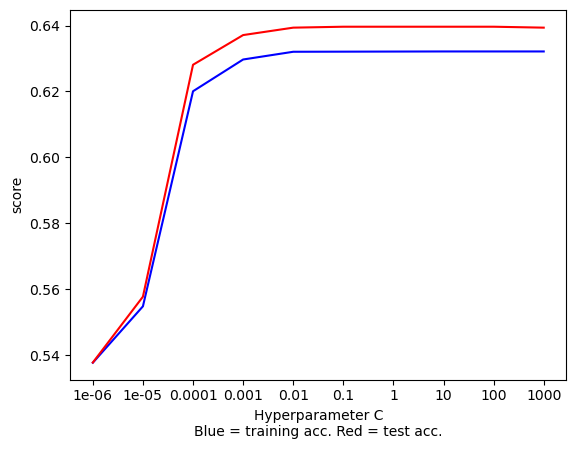

In [28]:
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


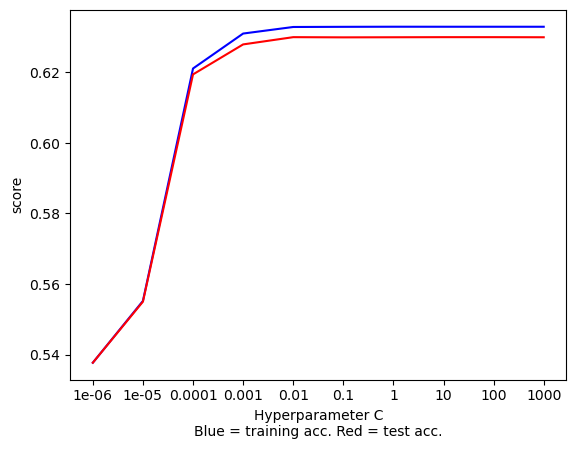

In [29]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [30]:
cv.best_estimator_

LogisticRegression(C=0.01, random_state=10)

In [31]:
cv.best_estimator_.score

<bound method ClassifierMixin.score of LogisticRegression(C=0.01, random_state=10)>

In [32]:
print(cv.best_params_)

{'C': 0.01}


In [33]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# classification report on test data
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6328283397161523
Test accuracy: 0.6283180026281209
              precision    recall  f1-score   support

       False       0.62      0.79      0.70      8184
        True       0.64      0.44      0.52      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.62      0.61     15220
weighted avg       0.63      0.63      0.62     15220



In [34]:
cv.cv_results_['rank_test_score']

array([10,  9,  8,  7,  1,  6,  5,  2,  2,  4])

In [35]:
cv.cv_results_['split8_test_score'] 

array([0.53759504, 0.55449169, 0.62123346, 0.62855534, 0.63615883,
       0.63559561, 0.63559561, 0.63559561, 0.63559561, 0.63559561])

In [36]:
cv_best = cv.best_estimator_

In [37]:
print("Train score: ", cv.score(X_train, y_train))
print("Test score: ", cv.score(X_test, y_test))

Train score:  0.6328283397161523
Test score:  0.6283180026281209


In [38]:
feature_names = X.columns
coef =cv_best.coef_[0]
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
indices = indices[:5]
for i in indices:
    print(feature_names[i], ':', coef[i])

number_inpatient : 0.48356582221376226
number_emergency : 0.2616777858657435
diabetesMed : 0.16105615076199198
number_outpatient : 0.11492780987078582
number_diagnoses : 0.09581997607631174


# Feature selection using RFE

In [39]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 111
Number of features after elimination 23


In [40]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [41]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.6317582788916423
Test accuracy: 0.6273324572930354
              precision    recall  f1-score   support

       False       0.62      0.80      0.70      8184
        True       0.65      0.43      0.52      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.61      0.61     15220
weighted avg       0.63      0.63      0.61     15220

{'C': 0.01}


In [42]:
# Get the coefficients of the best estimator
coef = rfe_cv.best_estimator_.coef_[0]

# Get the corresponding feature names
feature_names = X.columns

# Sort the coefficients in descending order and get the top 3 indices
top_3_indices = np.argsort(np.abs(coef))[::-1][:3]

# Get the top 3 feature names and their corresponding coefficients
top_3_features = [(feature_names[i], coef[i]) for i in top_3_indices]

# Print the top 3 features and their coefficients
for feature, coefficient in top_3_features:
    print(f"Feature: {feature}, Coefficient: {coefficient}")


Feature: number_outpatient, Coefficient: 0.49085661294810257
Feature: num_medications, Coefficient: 0.26575299661816004
Feature: number_inpatient, Coefficient: 0.1807099537039395


# Regression with DT

In [43]:
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv = pickle.load(f)
#dt_best.fit(X_train, y_train)

print(dt_best.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 5}


In [44]:
# analyse feature importance from the tuned decision tree
importances = dt_best.best_estimator_.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
indices = indices[:20]
for i in indices:
    print(feature_names[i], ':', importances[i])

number_inpatient : 0.6381981338908856
age : 0.07327214295078206
number_emergency : 0.06782710488619006
number_outpatient : 0.04473199817364742
diabetesMed : 0.026753088800269036
number_diagnoses : 0.0265376850020693
num_lab_procedures : 0.026524174597051867
num_medications : 0.021847087608436826
medical_specialty_Invalid : 0.0160967522990542
medical_specialty_InternalMedicine : 0.009895495899597017
insulin_Steady : 0.009318618299450085
num_procedures : 0.008437152889207475
race_Hispanic : 0.005894980006009106
A1Cresult_>8 : 0.005242670552721142
metformin_No : 0.00505123981362141
time_in_hospital : 0.0038341264876989465
metformin_Steady : 0.0030798567405517846
glyburide_Steady : 0.002160177027149097
glyburide_No : 0.0020130733532451118
medical_specialty_Family/GeneralPractice : 0.0020069990513469443


In [45]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

(35512, 11)


In [46]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

### For the params given, build a logistic regression model with GridSearch.

cv_sel_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

# test the best model
y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv_sel_model.best_params_)

Train accuracy: 0.6295899977472403
Test accuracy: 0.6266754270696452
              precision    recall  f1-score   support

       False       0.62      0.80      0.70      8184
        True       0.65      0.42      0.51      7036

    accuracy                           0.63     15220
   macro avg       0.63      0.61      0.60     15220
weighted avg       0.63      0.63      0.61     15220

{'C': 1}


# Comparison

In [47]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_sel)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)
print("ROC index on test for `cv_sel_model`:", roc_index_cv_sel_model)

ROC index on test for `model`: 0.6717469318522199
ROC index on test for `cv`: 0.6716280070876937
ROC index on test for `rfe_cv`: 0.6693297269676353
ROC index on test for `cv_sel_model`: 0.6657345278325628


In [48]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

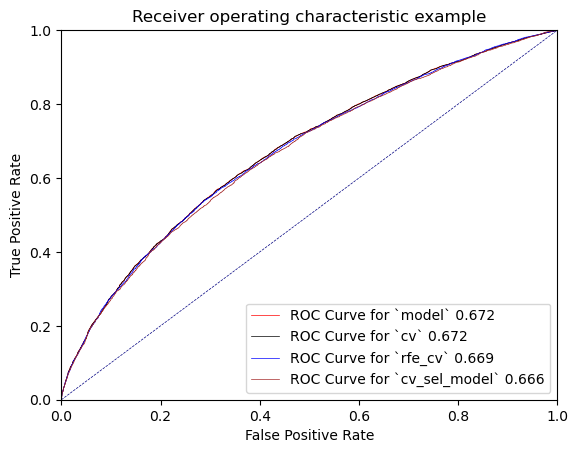

In [49]:
plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='black', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='ROC Curve for `cv_sel_model` {:.3f}'.format(roc_index_cv_sel_model), color='brown', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [50]:
import pickle
lr_best = cv_sel_model
roc_index_lr_best = roc_index_cv_sel_model
tpr_lr_best = tpr_cv_sel_model
fpr_lr_best = fpr_cv_sel_model
with open('LR.pickle', 'wb') as f:
    pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)